# Employee Promotion Prediction 

*What we are covering:*
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modeling 
6. Experimentation

## 1. Problem Definition
>A large MNC have 9 broad verticals across the organisation. One of the problem is identifying the right people for promotion (only for manager position and below) and prepare them in time.
The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


## 2. Data
>Multiple attributes have been provided around Employee's past and current performance along with demographics.
https://www.kaggle.com/arashnic/hr-ana


## 3. Evaluation
> if we can reach 95% accuracy at predicting whether an employee should be promoted or not 
during the evaluation process.

## 4. Features


* employee_id: Unique ID for employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won?: if awards won during previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target) Recommended for promotion

## Preparing the tools

* Import pandas,matplotlib and seaborn for Data Analysis and Visualization
* Import ipwidgets,Sweetviz,ppscore for Exploratory Data Analysis
* import Sklearn,imblearn for Machine Learning Modeling

In [353]:
## import all libraries

#for data manipulations
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for Modeling
from sklearn.model_selection import train_test_split
import imblearn

#setting up the size of figures
plt.rcParams['figure.figsize']=(16,5)

#setting up the style of plots
plt.style.use('bmh')


import warnings
warnings.filterwarnings('ignore')


In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Load Data
> We load the train and test data.
* Train data - used to train the models
* Test data -  used to make predictions

In [96]:
## load data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [97]:
## we check the shape of both datasets
print('Shape of Training data:',train_df.shape)
print('Shape of Test data:',test_df.shape)

Shape of Training data: (54808, 13)
Shape of Test data: (23490, 12)


In [5]:
## columns in training data
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [7]:
## columns in test data
test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [77]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


`Observations`
* Employee ID , Region and Recruitment channel are not really important in predicting if and employee need to promoted or not

## Performing Descriptive Statistics
* Continous columns
* Categorical columns

#### Continous(Numerical) columns

In [63]:
train_df.describe().style.background_gradient()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


##### `Obersevations:`
    
* No_of_training is right skewed , the mean is 1.25 > most of the values which are 1.00 
* previous_year_rating has a normal distribution , max value is 5 and min value is 1 and mean is 3.3
* length of service is right skewed 
* average_training_Score lies between 40 to 100 , which is good distribution

#### Categorical columns

In [15]:
train_df.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


`Observations`

* Sales & Marketing is the department with the highest number employees
* Most employees have Bachelors degree
* Most employees are Male

### Imbalanced Dataset

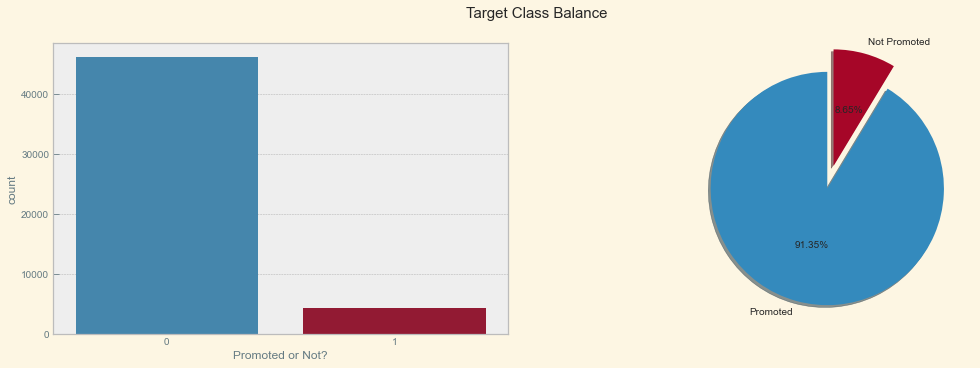

In [205]:

plt.subplot(1,2,1)

sns.countplot(train_df['is_promoted'])

plt.xlabel('Promoted or Not?',fontsize=12)

#create subplot
plt.subplot(1,2,2)
train_df['is_promoted'].value_counts().plot(kind='pie',explode=[0,0.2],
                                    autopct='%.2f%%',startangle=90,
                                    labels=['Promoted','Not Promoted'],
                                    shadow=True,pctdistance=.5)
plt.axis('off')

plt.suptitle('Target Class Balance',fontsize=15)
plt.show()

`Observations`
* from both the charts above it indicates that our dataset is highly imbalanced. ie there are about 91.5% of employees promoted and this will make our models prediction very inaccurate. so we have to rectify this before performing any predictions on this data.

## Data Cleaning

#### `Handling Missing Data`

In [99]:
## Percentages of missing values

num_missing_vals_train = train_df.isnull().sum()
num_missing_vals_test = test_df.isnull().sum()

perc_train = (train_df.isnull().sum()/train_df.shape[0])*100

perc_test = (test_df.isnull().sum()/test_df.shape[0])*100

all_data = {'Train_Total':num_missing_vals_train,'Train_Percent %':perc_train,
           'Test_Total':num_missing_vals_test,'Test_Percent %':perc_test}
df=pd.DataFrame(all_data)

In [100]:
## custom styling of Dataframe
def highlight_not_zero(s):
    '''
    highlight yellow is value is greater than mean else red.
    '''
    is_max = s > 0
    return ['background-color: crimson' if i else 'background-color: white' for i in is_max]

In [101]:
df.style.apply(highlight_not_zero)

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.395344,1034.000000,4.401873
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000
no_of_trainings,0,0.000000,0.000000,0.000000


`Observations`

* From the above table only Two(2) columns are missing from the train and test datasets.
        * Also the percentage of missing values in education is 4 % 
        * Percentage of missing vales in previous_year_rating is 7% in both datasets.
* Since theres a small percentage of data missing we can simply impute the values using either the mean,
mode or median 


In [102]:
### Imputing the missing values

train_df['education'] = train_df['education'].fillna(train_df['education'].mode()[0])
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(train_df['no_of_trainings'].mode()[0])

#lets check if theres still any missing data
print('Number of missing values is Training dataset',train_df.isnull().sum().sum())

Number of missing values is Training dataset 0


In [103]:
test_df['education'] = test_df['education'].fillna(test_df['education'].mode()[0])
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(test_df['no_of_trainings'].mode()[0])

#lets check if theres still any missing data
print('Number of missing values is Test dataset',train_df.isnull().sum().sum())

Number of missing values is Test dataset 0


#### `Handling Outliers`

In [104]:
## handle outliers in the numerical columns
train_df.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


`Observations`
* length of service and avg_training_score can have outliers since most employees:
     * Work in a company for 2-5 years max
     * Most employees score an average score of 40-60.
 
* So well check for outliers in these 2 columns

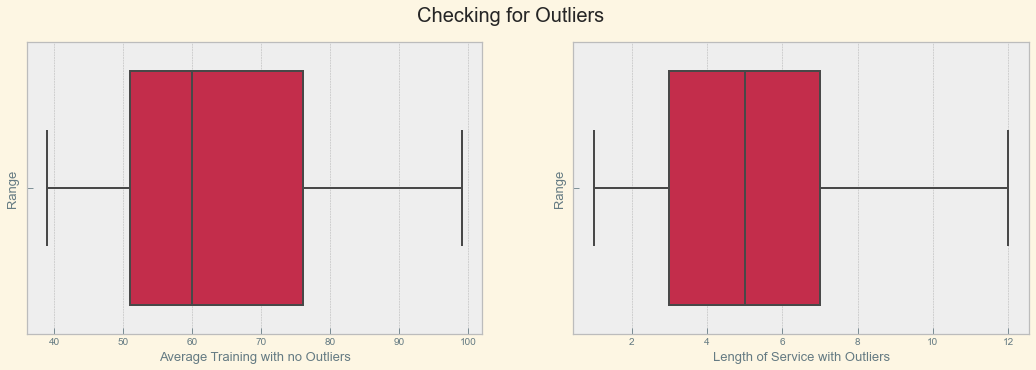

In [206]:
# boxplot for avg_training_score
plt.subplot(1,2,1)
sns.boxplot(train_df['avg_training_score'],color='crimson')
plt.xlabel('Average Training with no Outliers',fontsize=13)
plt.ylabel('Range',fontsize=13)

# boxplot for length_of_service
plt.subplot(1,2,2)
sns.boxplot(train_df['length_of_service'],color='crimson')
plt.xlabel('Length of Service with Outliers',fontsize=13)
plt.ylabel('Range',fontsize=13)

plt.suptitle('Checking for Outliers',fontsize=20)
plt.show()

`Observations`
* No outiers are found in the average training column
* Some outliers found in the lenght of service column

In [106]:
## Fix the outliers
train_df = train_df[train_df['length_of_service']<13]

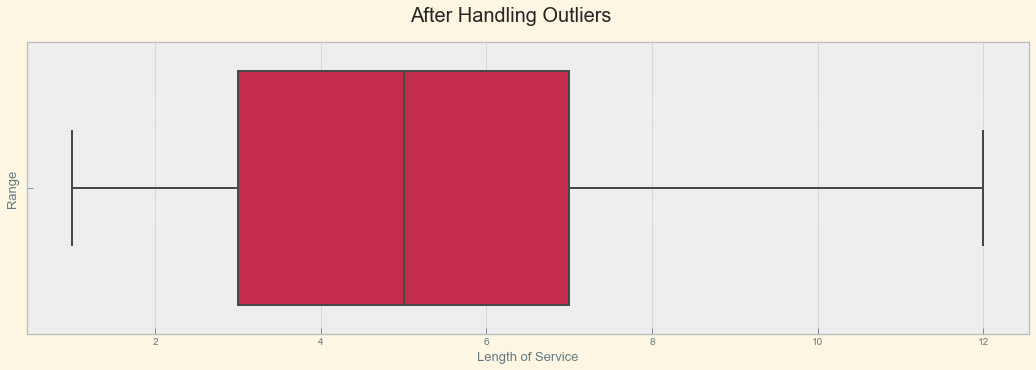

In [208]:
## lets check after handling
sns.boxplot(train_df['length_of_service'],color='crimson')
plt.xlabel('Length of Service',fontsize=13)
plt.ylabel('Range',fontsize=13)
plt.suptitle('After Handling Outliers',fontsize=20)
plt.show()

## Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis

### `Univariate Analysis`

In [117]:
train_df['previous_year_rating'].value_counts()

3.0    16992
5.0    10840
1.0     9845
4.0     9067
2.0     3888
Name: previous_year_rating, dtype: int64

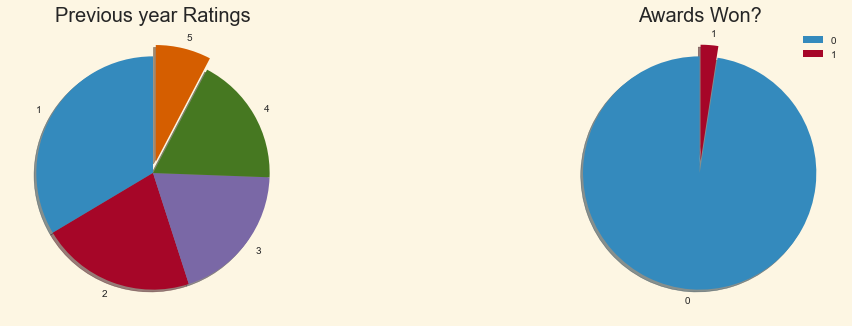

In [136]:
## plotting pie chart for Previous_year_rating
plt.subplot(1,2,1)
labels = ['1','2','3','4','5']
size = train_df['previous_year_rating'].value_counts()
explode = [0,0,0,0,0.1]

plt.pie(size,labels=labels,explode=explode,shadow=True,startangle=90)
plt.title('Previous year Ratings',fontsize=20);

## plotting pie chart for award won?
plt.subplot(1,2,2)
labels = ['0','1']
size = train_df['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0.1]

plt.pie(size,labels=labels,explode=explode,shadow=True,startangle=90)
plt.title('Awards Won?',fontsize=20);

plt.legend()
plt.show()

`Observation`
* from the pie charts , we can see that most of the employees have a very low rating
and very few employees get awards for their works.

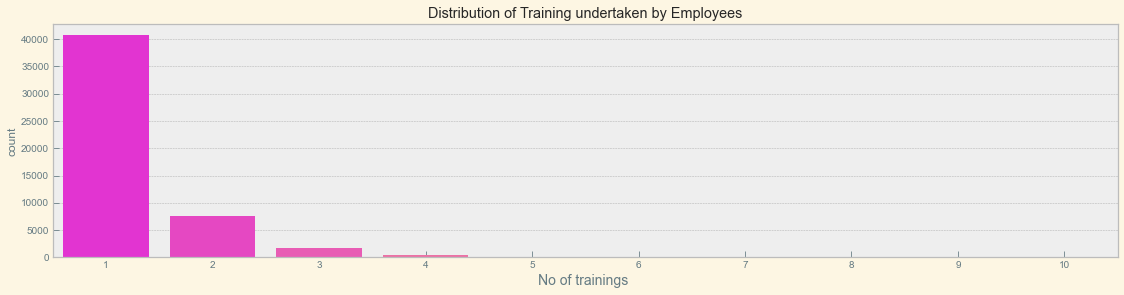

In [209]:
## we now check the distribution of 'no_of_training' undertaken by employees
plt.rcParams['figure.figsize']=(17,4)
sns.countplot(train_df['no_of_trainings'],palette='spring')
plt.xlabel('No of trainings ',fontsize=14)
plt.title('Distribution of Training undertaken by Employees')
plt.show()

`Observations`
* We can see from the chart that most employees(about 80%) take one training 

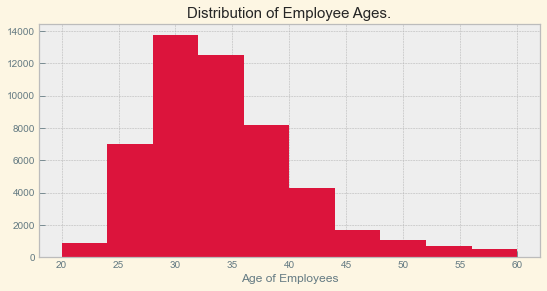

In [145]:
## we check the distribution of Age
plt.rcParams['figure.figsize']=(8,4)
plt.hist(train_df['age'],color='crimson')
plt.title('Distribution of Employee Ages.',fontsize=15)
plt.xlabel('Age of Employees')
plt.show()

`Observation`
* We can see that majority of employees fall between the ages of 25 to 40 years.

In [180]:
largest_to_small_dep= train_df.groupby('department').size().sort_values().index[::-1]
largest_to_small_dep

Index(['Sales & Marketing', 'Operations', 'Technology', 'Procurement',
       'Analytics', 'Finance', 'HR', 'Legal', 'R&D'],
      dtype='object', name='department')

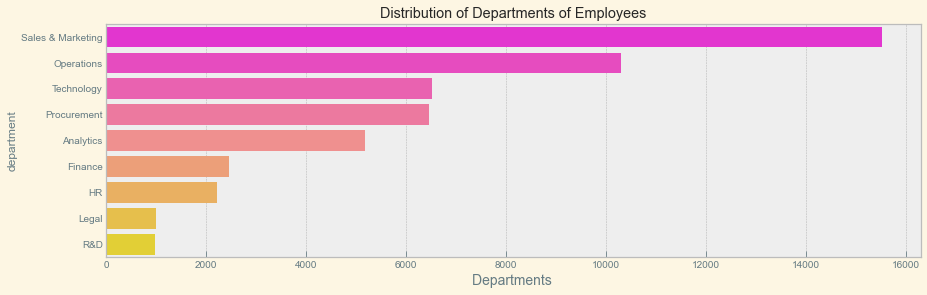

In [181]:
## we check the department column
## we now check the distribution of 'no_of_training' undertaken by employees
plt.rcParams['figure.figsize']=(13,4)
sns.countplot(y=train_df['department'],palette='spring',orient='v',order=largest_to_small_dep)
plt.xlabel('Departments ',fontsize=14)
plt.title('Distribution of Departments of Employees')
plt.show()


`Observations`
* The highest number of employees work in Sales & Marketing 
* The Lowest number of employees are in R&D and Legal

In [178]:
largest_to_small_reg= train_df.groupby('region').size().sort_values().index[::-1]
largest_to_small_reg

Index(['region_2', 'region_22', 'region_7', 'region_15', 'region_13',
       'region_26', 'region_31', 'region_27', 'region_4', 'region_16',
       'region_28', 'region_11', 'region_23', 'region_29', 'region_32',
       'region_20', 'region_19', 'region_25', 'region_14', 'region_5',
       'region_17', 'region_6', 'region_8', 'region_30', 'region_10',
       'region_1', 'region_24', 'region_12', 'region_9', 'region_21',
       'region_3', 'region_34', 'region_33', 'region_18'],
      dtype='object', name='region')

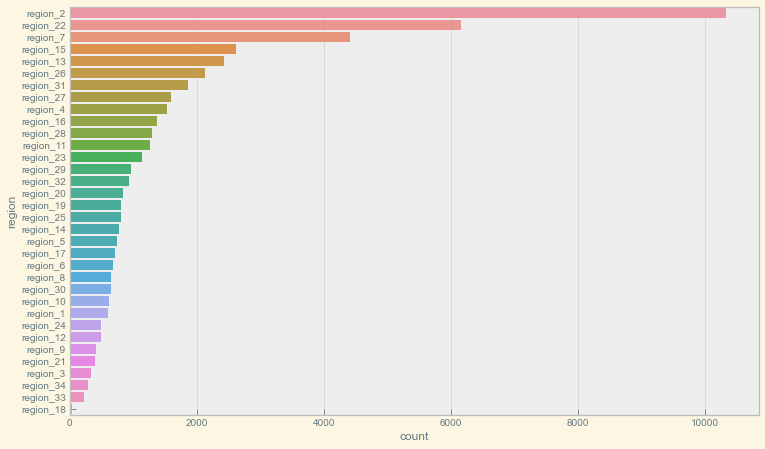

In [210]:
plt.rcParams['figure.figsize']=(11,7)
sns.countplot(y=train_df['region'],orient='v',order=largest_to_small_reg)
plt.show()

`Observations`
* Most employees are from regions 2 , regions 22 and region 7.

In [182]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50632 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           50632 non-null  int64  
 1   department            50632 non-null  object 
 2   region                50632 non-null  object 
 3   education             50632 non-null  object 
 4   gender                50632 non-null  object 
 5   recruitment_channel   50632 non-null  object 
 6   no_of_trainings       50632 non-null  int64  
 7   age                   50632 non-null  int64  
 8   previous_year_rating  50632 non-null  float64
 9   length_of_service     50632 non-null  int64  
 10  awards_won?           50632 non-null  int64  
 11  avg_training_score    50632 non-null  int64  
 12  is_promoted           50632 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 7.4+ MB


In [201]:
train_df['education'].value_counts()

Bachelor's          36965
Master's & above    12862
Below Secondary       805
Name: education, dtype: int64

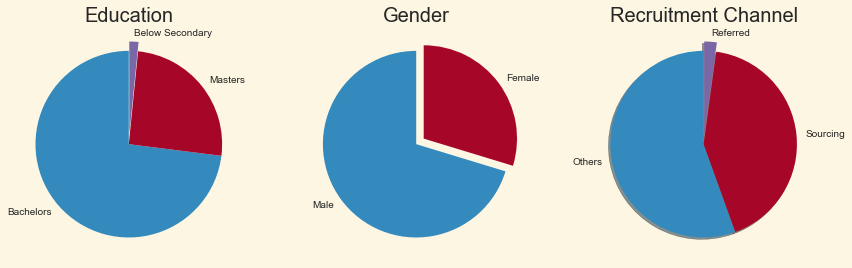

In [202]:
## plot a pie chart for Education
plt.subplot(1,3,1)
labels = ['Bachelors','Masters','Below Secondary']
explode = [0,0,0.1]
size= train_df['education'].value_counts()
plt.pie(size,explode=explode,labels=labels,startangle=90)
plt.title('Education',fontsize=20)

## plot a pie chart for gender
plt.subplot(1,3,2)
labels = ['Male','Female']
explode = [0,0.1]
size= train_df['gender'].value_counts()
plt.pie(size,explode=explode,labels=labels,startangle=90)
plt.title('Gender',fontsize=20)


## plot a pie chart for recruitment channel
plt.subplot(1,3,3)
labels = ['Others','Sourcing','Referred']
explode = [0,0,0.1]
size= train_df['recruitment_channel'].value_counts()
plt.pie(size,explode=explode,labels=labels,startangle=90,shadow=True)
plt.title('Recruitment Channel',fontsize=20)

plt.show()

`Observations`
* About 70 of employee or more have had a Bachelors Degree.
* Most employees are males
* A small number of employees were reffered

### `Bivariate Analysis`

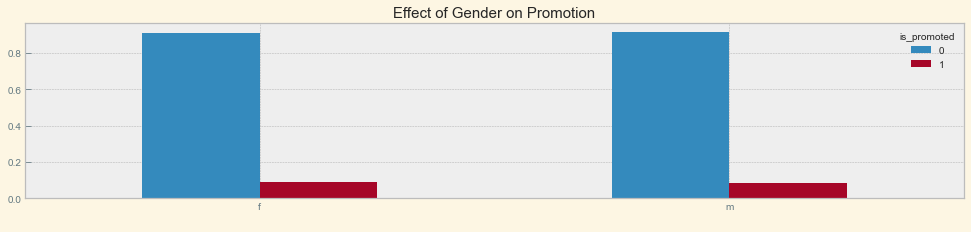

In [230]:
## we compare the gender gap in promotion

plt.rcParams['figure.figsize'] = (15,3)
x =pd.crosstab(train_df['gender'],train_df['is_promoted'])
## convert figures to float numbers and plot bar chart row-wise
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title('Effect of Gender on Promotion',fontsize=15)
plt.xticks(rotation=360)
plt.xlabel(' ')
plt.show()


`Observation`
* from the chart we can see that there no gender gap in promotion of employees

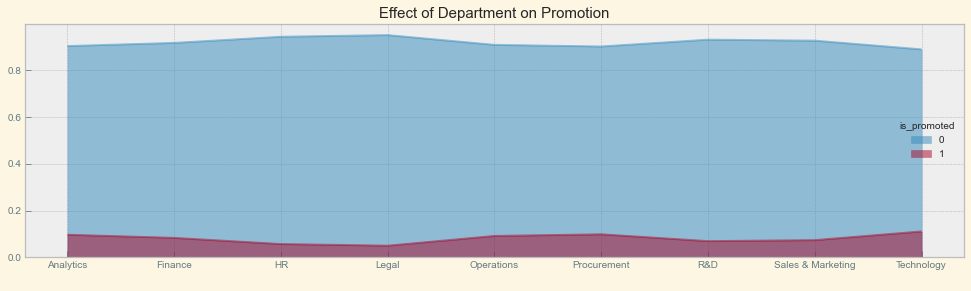

In [232]:
## we compare the departments in promotion

plt.rcParams['figure.figsize'] = (15,4)
x =pd.crosstab(train_df['department'],train_df['is_promoted'])
## convert figures to float numbers and plot bar chart row-wise
x.div(x.sum(1).astype(float),axis=0).plot(kind='area',stacked=False)
plt.title('Effect of Department on Promotion',fontsize=15)
plt.xticks(rotation=360)
plt.xlabel(' ')
plt.show()


In [360]:
pd.crosstab(train_df['department'],train_df['is_promoted'])

is_promoted,0,1
department,,
Analytics,4687,500
Finance,2244,203
HR,2100,126
Legal,939,49
Operations,9357,940
Procurement,5828,635
R&D,917,68
Sales & Marketing,14381,1138
Technology,5799,721


`Observations`
* from the area graph we can conclude that employees from departments such as ; Analytics , Operations, Procurement
and Technology get promoted most.

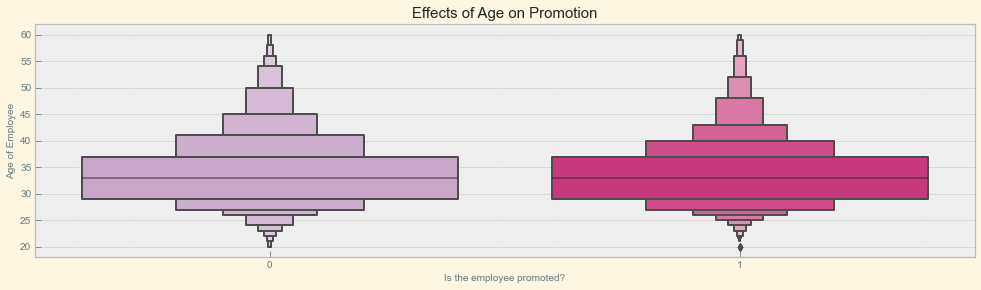

In [233]:
## Effects of age on promotion
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train_df['is_promoted'],train_df['age'],palette='PuRd')
plt.title('Effects of Age on Promotion',fontsize=15)
plt.xlabel('Is the employee promoted?',fontsize=10)
plt.ylabel('Age of Employee',fontsize=10)
plt.show()

`Observations`
* We can see from the plot above that most employees who get promoted or not are in the 30 to 40 years range.

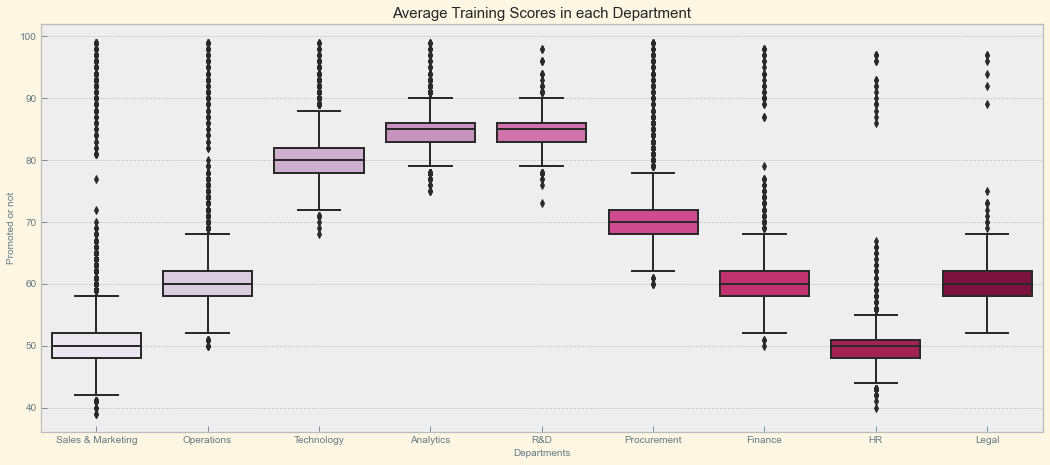

In [239]:
## Department vs Average Training score

plt.rcParams['figure.figsize']=(16,7)
sns.boxplot(train_df['department'],train_df['avg_training_score'],palette='PuRd')
plt.title('Average Training Scores in each Department',fontsize=15)
plt.ylabel('Promoted or not',fontsize=10)
plt.xlabel('Departments',fontsize=10)
plt.show()

`Observations`
* Most employees from (Technology, Analytics and R&D departments have an average score of atleast 80.
* Sales & Marketing and HR department have employees with the lowest scores.

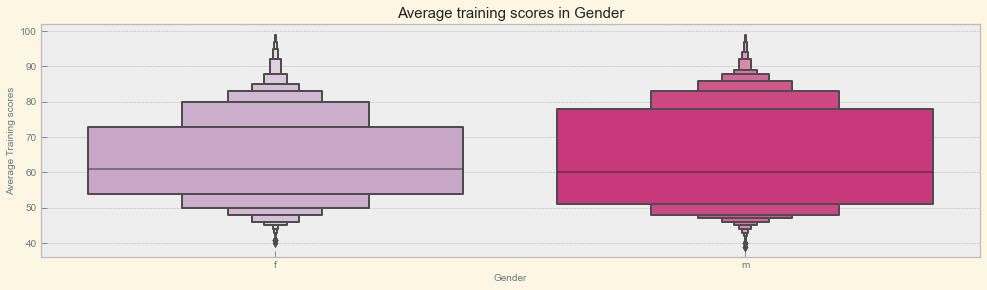

In [275]:
## gender vrs average score
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train_df['gender'],train_df['avg_training_score'],palette='PuRd')
plt.title('Average training scores in Gender',fontsize=15)
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Average Training scores',fontsize=10)
plt.show()

`Observations`
* Most females have an average training score of 50 - 72 
* Most Males have an average training score of 50-75

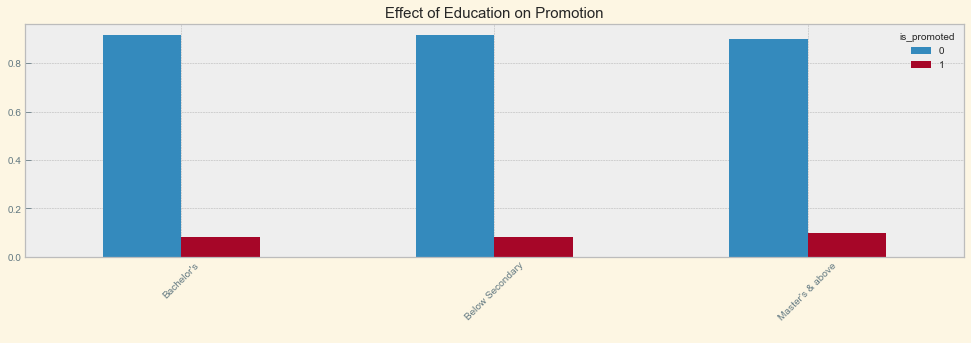

In [307]:
## we compare the education in promotion

plt.rcParams['figure.figsize'] = (15,4)
x =pd.crosstab(train_df['education'],train_df['is_promoted'])
## convert figures to float numbers and plot bar chart row-wise
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title('Effect of Education on Promotion',fontsize=15)
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.show()

`Observation` 
* From the graph/chart Education does not influence promotion in any way

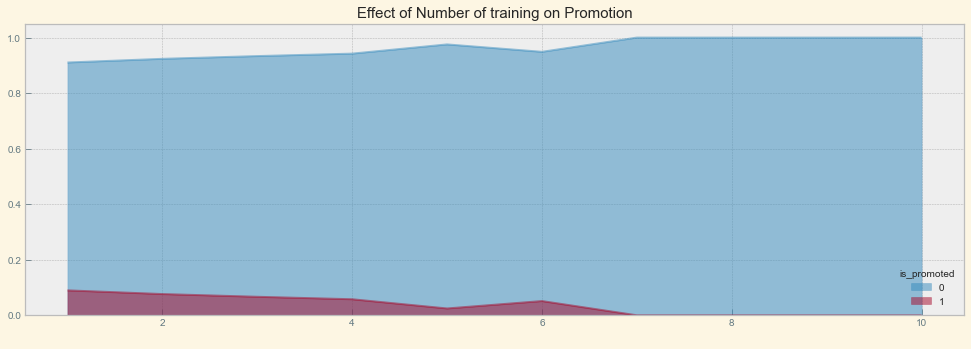

In [314]:
## we compare the number_training in promotion

plt.rcParams['figure.figsize'] = (15,5)
x =pd.crosstab(train_df['no_of_trainings'],train_df['is_promoted'])
## convert figures to float numbers and plot bar chart row-wise
x.div(x.sum(1).astype(float),axis=0).plot(kind='area',stacked=False)
plt.title('Effect of Number of training on Promotion',fontsize=15)
plt.xlabel(' ')
plt.show()

`Observation`
* From the graph we can deducde that; as the number of training increases the lower the chances of getting promoted.

### `Multivariate Analysis`

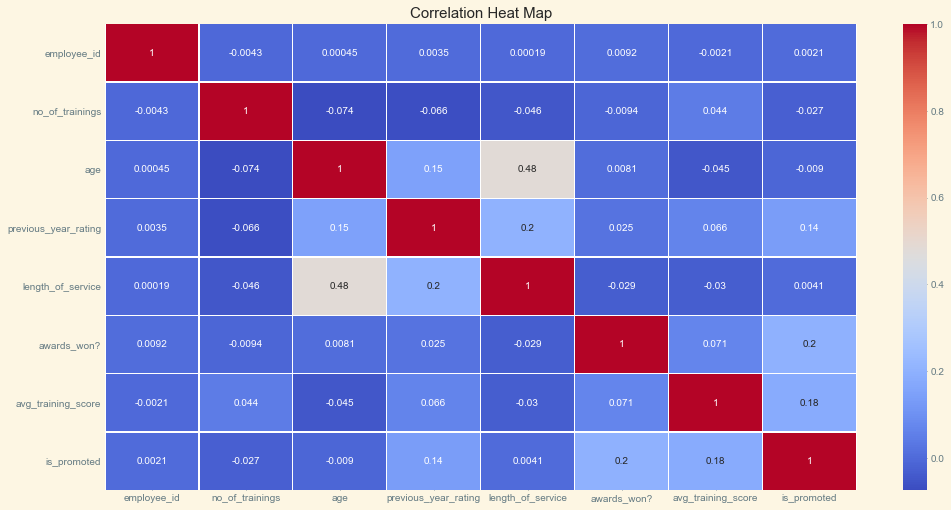

In [335]:
## We check the heatmap for the Data with respect to correlaton
plt.rcParams['figure.figsize']=(15,8)
sns.heatmap(train_df.corr(),annot=True,linewidths=.5,cmap='coolwarm')
plt.title('Correlation Heat Map',fontsize=15)
plt.show()

`Observations`
* Age and length of service are moderately correlated

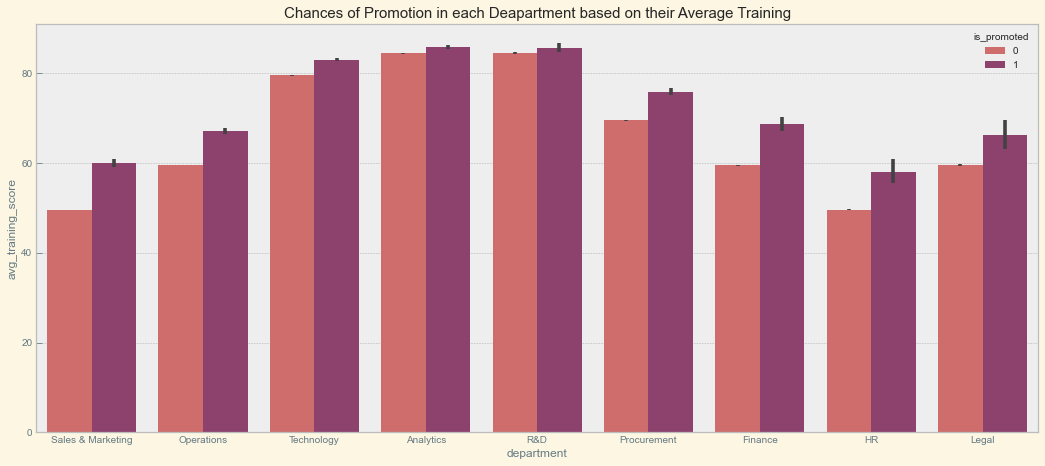

In [351]:
## We check the relation of Departments and average_training and whether they are male or female?

plt.rcParams['figure.figsize']=(16,7)
sns.barplot(train_df['department'],train_df['avg_training_score'],hue=train_df['is_promoted'],palette='flare');
plt.title('Chances of Promotion in each Deapartment based on their Average Training',fontsize=15)
plt.show()

`Observations`
* In Sales & Marketing , chances of you getting promoted when you have an average training score
of greater than 50 is pretty high.
* In Operations , chances of you getting promoted when you have an average training score
of greater than 60 is moderately high.
* But for Technology , Analytics and R&D departments, there are no clear cut average training score that gets you promoted.